### `4-3.Clustering Analysis`

* k 개의 변수가 포함된 변수가 있을 때 각각의 변수 간 거리를 행렬로 나타내면 k X k 행렬이 생성됨(거리 행렬)

* 데이터 거리: Data와 Data 사이의 거리
    * 거리가 무엇인지 정확히 정의해야 함
    * 예를 들어, 
        * 유클리드 거리(Euclidean distance): 수학적인 두 점 사이의 거리
            <img src="">
        * 맨하튼 거리(Manhattan distance, 택시 거리, L1 거리, 시가지 거리, Taxicab geometry)): 두 점 사이의 절댓값 차이에 따른 새로운 거리
            <img src="">
        * 민코프스키 거리(Minkowski distance): 민코프스키 거리는 일반 상대성 이론에서 사용되는 거리 개념으로, 민코프스키 공간에서 두 지점 사이의 거리

* 군집 분석의 세 종류

    * Dendrogram: 거리 행렬을 통해 데이터 포인트를 모두 계산, 계층형 군집 분석
        
        다음과 같은 항목을 확인할 수 있음
        * 어느 데이터간 거리가 가까운지
        * 군집이 어떤 식으로 형성되는지
        * 몇 개의 군집이 있는지
        <img src="">

        다음과 같은 특징이 있음
        * 많은 메모리가 필요함
        * 대체적으로 큰 규모의 데이터에서는 사용이 어려움
        * 전반적인 군집의 패턴 확인에 용이하여 사전 분석 용도로 적합함

    * k-means(k개의 평균): 데이터 간의 평균 벡터 이용, 평균 계산을 사용하여 군집 계산, 비계층형 군집 분석
        
        다음과 같은 방식으로 진행함
        1. 임의의 k개 점을 Cluster Centor로 가정(k는 유저가 적절히 선택, 단, 시각화나 EDA를 통해 효율적인 k를 설정할 수는 있음)
        2. 해당 점과 나머지 데이터 간의 거리를 구하고 거리에 따라서 가장 가까운 Cluster Centor의 Cluster에 포함(총 k개의 Cluster)
        3. 각 Cluster 내의 평균 벡터(Cluster Centor)를 다시 구함
        4. 2~3을 반복
        5. 기존 Cluster Centor와 새로운 Cluster Centor의 변화가 없을 때 Clustering이 완료됨
        
        다음과 같은 특징이 있음
        * 원 형태의 군집 데이터에 최적화 되어 있어 길쭉한 형태의 군집은 잘 잡아내지 못함
        * 이해와 구현이 쉬워 오랫동안 사용되고 있는 알고리즘 방식

    * DBSCAN(Density-based): 밀도가 높은 부분을 군집으로 평가, 밀도가 높을수록 군집 형성, 비계층형 군집 분석
        
        다음과 같은 특징이 있음
        * 길쭉한 형태의 군집도 잘 잡아냄
        * 노이즈(어느 군집에도 속하지 못한 데이터)를 자동으로 잡아낼 수 있음

* 양 Cluster 간 거리 계산법
    * 최단 연결법(Single Linkage): 두 Cluster 내 데이터 간 거리 중 최소값
    * 최장 연결법(Complete Linkage): 두 Cluster 내 데이터 간 거리 중 최대값
    * 평균 연결법(Average Linkage): 두 Cluster 내 모든 데이터 간 거리의 평균값
    * 중심 연결법(Centroid Linkage): 각 Cluster의 중심(평균) 간 거리
    * 워드 연결법(Ward Linkage): 두 Cluster의 오차제곱합 중 작은 쪽과 두 Cluster를 하나로 합쳤을 때 오차제곱합의 차를 거리로 설정

* 군집 분석은 Target이 없는 Data Set을 통해 훈련하는 것으로 데이터 내에서 패턴을 찾는 비감독학습(비지도학습)임

---
#### 코드블럭1
**Clustering - k-means analysis 예시 코드 1 시작**

붓꽃(Iris) 데이터에 대한 Clustering Model

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, cluster

# iris 데이터 불러오기
iris = datasets.load_iris()
data = iris["data"]

# K-Means Clustering 모델 생성 및 훈련
model = cluster.KMeans(n_clusters=4) # cluster의 개수는 미리 정해야 함, 주관적으로 정함
model.fit(data) # Clustering Model은 지도 학습이 아니므로 훈련 데이터만 사용

# 훈련 결과 확인
print(model.labels_) # 각 데이터의 군집 번호 출력

# 군집별로 데이터를 분류하여 저장, 시각화하였을 때 군집이 잘 형성되었는지 확인, 군집이 잘 형성되었다면 군집별로 색상이 구분되어야 함
# 군집이 잘 형성되지 않았다면 색상이 구분되지 않거나 군집이 겹쳐져 있음, 군집이 잘 형성되지 않았다면 군집의 개수를 늘려서 다시 훈련
cluster1 = data[model.labels_ == 0] # 군집 1, 빨간색
plt.scatter(cluster1[:,2], cluster1[:,3], c="red", label="cluster1")

cluster2 = data[model.labels_ == 1] # 군집 2, 파란색
plt.scatter(cluster2[:,2], cluster2[:,3], c="blue", label="cluster2")

cluster3 = data[model.labels_ == 2] # 군집 3, 초록색
plt.scatter(cluster3[:,2], cluster3[:,3], c="green", label="cluster3")

cluster4 = data[model.labels_ == 3] # 군집 4, 노란색
plt.scatter(cluster4[:,2], cluster4[:,3], c="yellow", label="cluster4")

# 축 라벨 설정
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.legend()
plt.show()

In [ ]:
# 모델이 예측한 각 데이터의 군집 번호와 실제 군집 번호를 비교하여 정확도 측정
model.labels_  # 모델이 예측한 각 데이터의 군집 번호
iris["target"] # 실제 군집 번호

# 모델이 예측한 군집 번호와 실제 군집 번호를 비교하여 정확도 측정
sum(model.labels_ == iris["target"]) / len(iris["target"])

**Clustering - k-means analysis 예시 코드 1 종료**

---

---
#### 코드블럭2
**Clustering - k-means analysis 예시 코드 2 시작**

붓꽃(Iris) 데이터에 대한 Clustering Model, Dendrogram 계층 분석

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, cluster

# iris 데이터 불러오기
iris = datasets.load_iris()
data = iris["data"]

# 계층형 Clustering 모델 생성 및 훈련
model = cluster.AgglomerativeClustering(n_clusters=4, linkage="ward") # cluster의 개수는 미리 정해야 함, 주관적으로 정함
model.fit(data) # Clustering Model은 지도 학습이 아니므로 훈련 데이터만 사용

# 데이터 정의
x_index = 2 # X축에 사용할 feature의 index
y_index = 3 # Y축에 사용할 feature의 index

data_x = data[:,x_index] # X축에 사용할 feature
data_y = data[:,y_index] # Y축에 사용할 feature

x_label = iris["feature_names"][x_index] # X축에 사용할 feature의 이름
y_label = iris["feature_names"][y_index] # Y축에 사용할 feature의 이름

# 군집별로 데이터를 분류하여 저장, 시각화하였을 때 군집이 잘 형성되었는지 확인, 군집이 잘 형성되었다면 군집별로 색상이 구분되어야 함
# 군집이 잘 형성되지 않았다면 색상이 구분되지 않거나 군집이 겹쳐져 있음, 군집이 잘 형성되지 않았다면 군집의 개수를 늘려서 다시 훈련
cluster1 = data[model.labels_ == 0] # 군집 1, 빨간색
plt.scatter(cluster1[:,x_index], cluster1[:,y_index], c="red", label="cluster1")

cluster2 = data[model.labels_ == 1] # 군집 2, 파란색
plt.scatter(cluster2[:,x_index], cluster2[:,y_index], c="blue", label="cluster2")

cluster3 = data[model.labels_ == 2] # 군집 3, 초록색
plt.scatter(cluster3[:,x_index], cluster3[:,y_index], c="green", label="cluster3")

cluster4 = data[model.labels_ == 3] # 군집 4, 노란색
plt.scatter(cluster4[:,x_index], cluster4[:,y_index], c="yellow", label="cluster4")

# 축 라벨 설정
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()


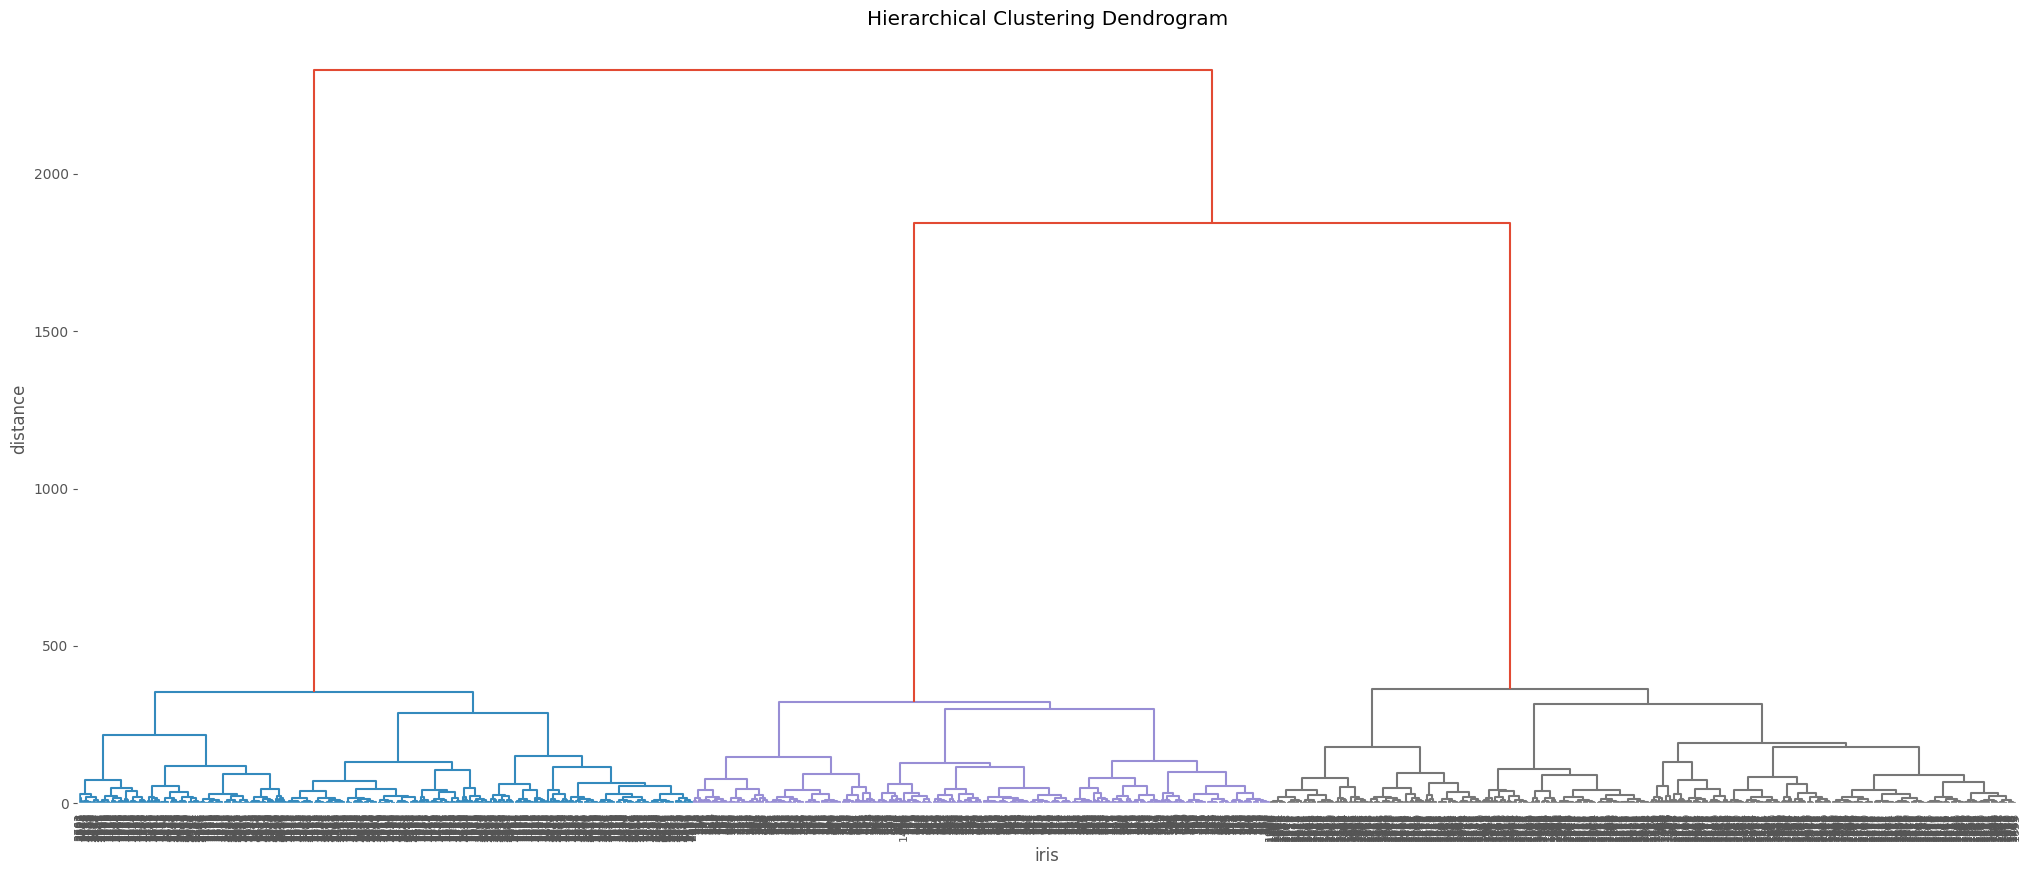

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# linkage 함수를 사용하여 계층형 군집화 수행
Z = linkage(data, "ward") # ward 방식을 사용하여 linkage 수행

# dendrogram 그리기
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("iris")
plt.ylabel("distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

**Clustering - k-means analysis 예시 코드 2 종료**

---

---
#### 코드블럭3
**Clustering - k-means analysis 예시 코드 3 시작**

학생 별 성적 데이터에 대한 Clustering Model, Dendrogram 계층 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster

# "academy.csv"에서 데이터 프레임 생성 및 No. 열 삭제, 최초 5개 데이터 출력
academy = pd.read_csv("https://raw.githubusercontent.com/imbiotech/skbtML/main/4-3-1.academy.csv")
academy.drop("No.", axis=1, inplace=True)
print(academy.head())


# 데이터 프레임을 array로 변환
academy_array = np.array(academy)
print(academy_array)

   Kor  Math  Eng  Sci  Score
0   90    75   85   60     70
1   65    90   60   88     80
2   45    53   48   50     60
3   77    96   62   92     70
4   88    89   80   82     90
[[ 90  75  85  60  70]
 [ 65  90  60  88  80]
 [ 45  53  48  50  60]
 [ 77  96  62  92  70]
 [ 88  89  80  82  90]
 [ 90  92  90  96 100]
 [ 65  70  66  76  70]
 [ 60  90  70  98  80]
 [ 46  56  43  55  60]
 [ 88  67  90  70  70]
 [ 70  93  77  89  60]
 [ 99  80  95  70  80]
 [ 97  67  80  60  80]
 [ 50  40  30  54  50]
 [ 90  77  92  60  70]
 [ 55  88  67  92  60]
 [ 77  90  70  98  70]
 [ 90  89  80  92  90]
 [ 76  90  80  92  70]
 [ 70  92  80  95  70]
 [ 76  75  70  82  80]
 [ 77  92  68  89  80]
 [ 60  50  70  40  60]
 [ 54  70  56  72  60]
 [ 72  88  67  95  80]
 [ 58  76  59  80  70]
 [ 88  60  76  58  60]
 [ 84  88  90  92  90]
 [ 45  76  56  78  70]
 [ 76  54  70  58  70]
 [ 66  90  70  88  70]
 [ 88  80  85  88  90]
 [ 71  48  69  50  80]
 [ 90  77  82  65  80]
 [ 34  32  45  50  50]
 [ 56  78  67  

In [ ]:
#k-means 모델 생성 및 훈련
model = cluster.KMeans(n_clusters=5)
model.fit(academy_array)

# 훈련 결과 확인
labels = model.labels_
labels

In [ ]:
# 그래프 그리기
ldata = academy_array[labels == 0] # 군집 1
plt.scatter(ldata[:,2], ldata[:,3], c="red", label="cluster1")

ldata = academy_array[labels == 1] # 군집 2
plt.scatter(ldata[:,2], ldata[:,3], c="blue", label="cluster2")

ldata = academy_array[labels == 2] # 군집 3
plt.scatter(ldata[:,2], ldata[:,3], c="green", label="cluster3")

ldata = academy_array[labels == 3] # 군집 4
plt.scatter(ldata[:,2], ldata[:,3], c="yellow", label="cluster4")

ldata = academy_array[labels == 4] # 군집 5
plt.scatter(ldata[:,2], ldata[:,3], c="purple", label="cluster5")

plt.legend() # 범례 표시
plt.xlabel(academy.columns[2]) # X축 라벨 표시
plt.ylabel(academy.columns[3]) # Y축 라벨 표시
plt.show()

In [ ]:
# dendrogram 그리기
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(academy_array, "ward") # ward 방식을 사용하여 linkage 수행

plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("academy")
plt.ylabel("distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

**Clustering - k-means analysis 예시 코드 3 종료**

---

---
#### 코드블럭4
**Clustering - k-means analysis 예시 코드 4 시작**

임의의 데이터(xclara)에 대한 Clustering Model

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 데이터 불러오기
plt.rcParams['figure.figsize'] = (16, 9) # 그래프의 크기 설정
plt.style.use('ggplot') # 그래프의 스타일 설정, ggplot은 R에서 사용하는 그래프 스타일

data = pd.read_csv('https://raw.githubusercontent.com/imbiotech/skbtML/main/4-3-2.xclara.csv') # 데이터 불러오기
data.head() # 데이터 확인

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


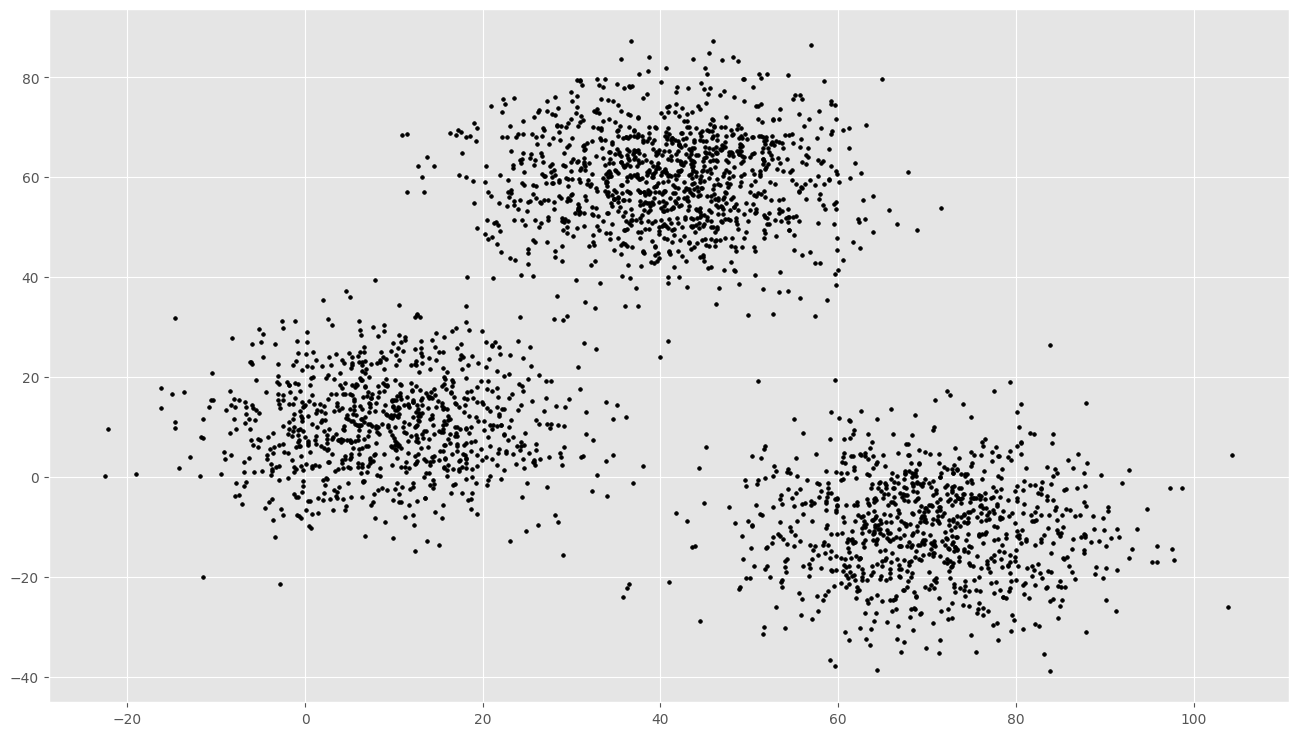

In [ ]:
f1 = data['V1'].values # V1 열의 데이터를 f1에 저장
f2 = data['V2'].values # V2 열의 데이터를 f2에 저장

x = np.array(list(zip(f1, f2))) # f1과 f2를 하나의 리스트로 묶어 x에 저장
plt.scatter(f1, f2, c='black', s=7) # f1과 f2를 산점도로 표시

c:\Users\지민섭\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


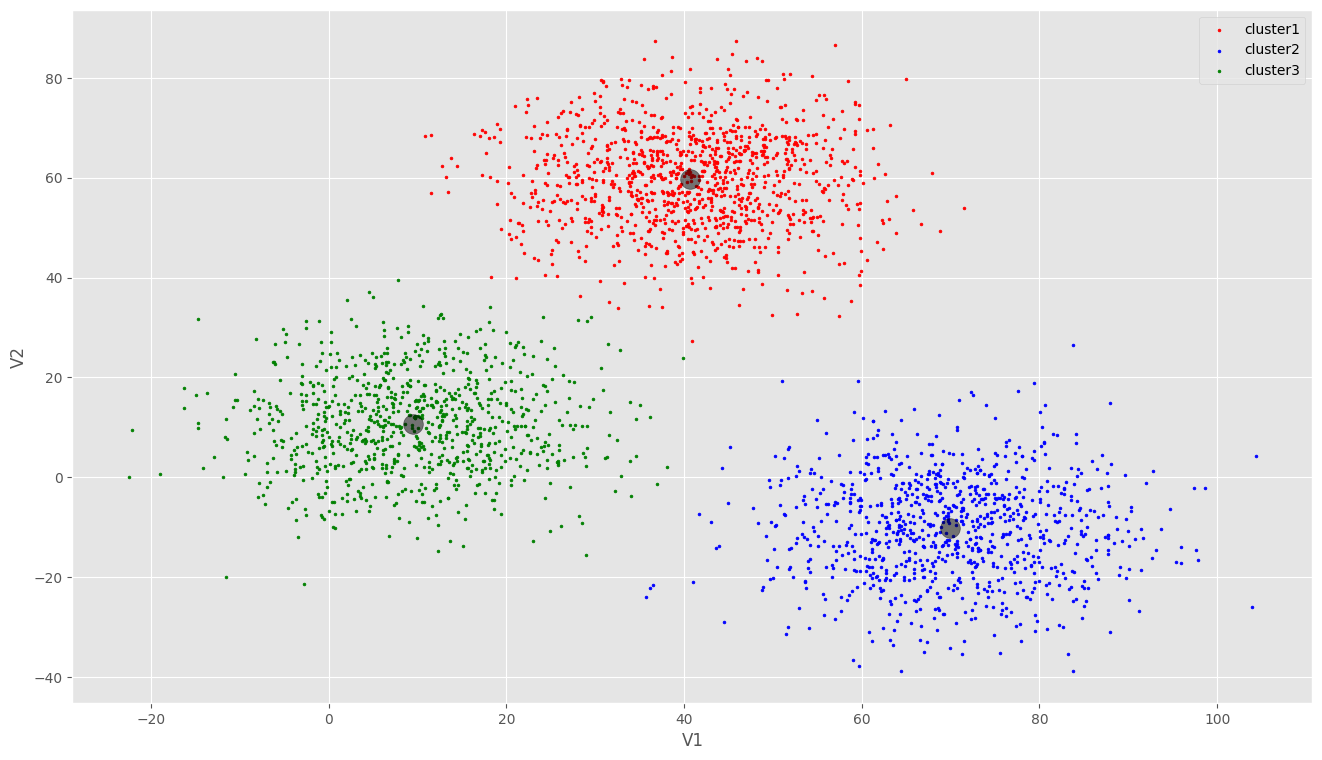

In [ ]:
# 3개의 군집으로 구성하는 것이 적절해 보임
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) # K-Means 모델 생성
kmeans = kmeans.fit(x) # 모델 훈련
labels = kmeans.predict(x) # 예측 결과를 labels에 저장

# 군집별로 데이터를 분류하여 저장, 시각화하였을 때 군집이 잘 형성되었는지 확인, 군집이 잘 형성되었다면 군집별로 색상이 구분되어야 함
# 군집이 잘 형성되지 않았다면 색상이 구분되지 않거나 군집이 겹쳐져 있음, 군집이 잘 형성되지 않았다면 군집의 개수를 늘려서 다시 훈련
ldata = x[labels == 0] # 군집 1, 빨간색
plt.scatter(ldata[:,0], ldata[:,1], c="red", label="cluster1", s=4) # ldata[:,0]은 x좌표, ldata[:,1]은 y좌표, s는 점의 크기, label은 범례에 표시될 이름, c는 색상

ldata = x[labels == 1] # 군집 2, 파란색
plt.scatter(ldata[:,0], ldata[:,1], c="blue", label="cluster2", s=4)

ldata = x[labels == 2] # 군집 3, 초록색
plt.scatter(ldata[:,0], ldata[:,1], c="green", label="cluster3", s=4)

# 군집의 중심점을 표시
centers = kmeans.cluster_centers_ # 군집의 중심점을 centers에 저장
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5) # 군집의 중심점을 산점도로 표시

plt.legend() # 범례 표시
plt.xlabel('V1') # X축 라벨 표시
plt.ylabel('V2') # Y축 라벨 표시
plt.show()


**Clustering - k-means analysis 예시 코드 4 종료**

---